# Fashion Mnist Dataset- Recognition of the Type of Items

In [58]:
#Goal of this project: predicting the label- meaning what kind of an item/clothing it is 
#by the data's (items) features.


#imports for a Fashion Mnist predictor model

import pandas as pd
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.optimizers import SGD
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
pca= PCA(n_components=0.95)


#reading the training dataset
data=pd.read_csv(r'C:\Users\97252\OneDrive\שולחן העבודה\הדנת- עבודת גמר\Fashion Mnist dataset\fashion-mnist_train.csv')

X = data.drop("label",axis = 1)
y = data.label

#shows the dataset
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#PERFORMING PCA ON THE TRAINING DATA since it's very big

pcadX = pca.fit_transform(X)

# splitting the data into training and testing sets, with the pcad data(features)

X_train, X_test, y_train, y_test = train_test_split(pcadX, y, test_size=0.2, random_state=0)

pcadX.shape


(60000, 187)

In [60]:
X.shape

(60000, 784)

In [61]:
#let's observe our labels!

y_train

5778     5
5287     4
57167    0
29516    0
58610    1
        ..
45891    5
52416    7
42613    0
43567    9
2732     1
Name: label, Length: 48000, dtype: int64

# ... Got yourselves asking- what do those numbers mean?!
# So did we!
# Get to know the labels!

1- T-shirt/top
2- Trouser/pants
3- Pullover shirt
4- Dress
5- Coat
6- Sandal
7- Shirt
8- Sneaker
9- Bag
10- Ankle boot


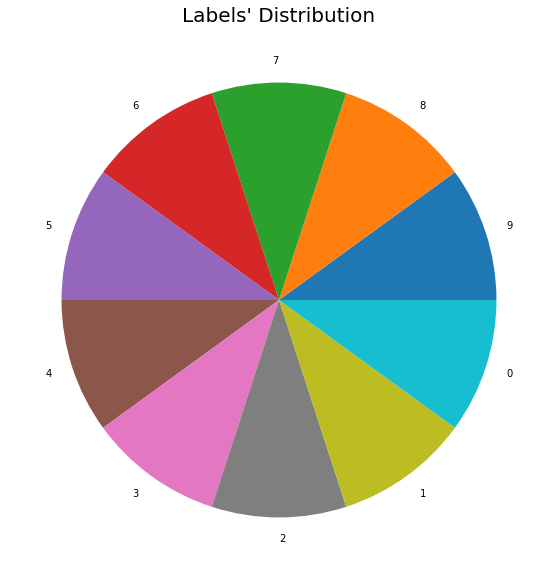

<Figure size 432x288 with 0 Axes>

In [49]:
#Graph: plotting how many labels there are, in every kind- 

%matplotlib inline

import matplotlib.pyplot as plt

#matplot 1

#price distribution of apps

plt.figure(figsize=(10, 10))

axes= data.label.value_counts().plot(kind='pie')
axes.set_title("Labels' Distribution", fontsize=20)

axes.set_xlabel("")
axes.set_ylabel("")

fig1 = plt.gcf()
plt.show()
plt.draw()

#seems like they're equally fitted there!


 The Classifier is 
 KNeighborsClassifier(n_neighbors=3)

 The Model's Score is 0.857
Confusion Matrix for this KNeighborsClassifier(n_neighbors=3)
[[1007    1   13   23    3    0  138    0    4    0]
 [   8 1157    5   18    1    0    0    0    0    0]
 [  21    3  953    6  114    0  104    0    3    0]
 [  56    4   17 1108   49    0   25    0    1    0]
 [  17    1  152   48  900    0   88    0    2    0]
 [   3    0    0    2    0 1043    4   74    3   59]
 [ 238    0  144   20   76    0  706    0   11    0]
 [   0    0    0    0    0    8    0 1100    0   52]
 [   6    1   14    7    5    0    9    4 1160    4]
 [   0    0    0    0    0    7    0   36    1 1153]]

AxesSubplot(0.125,0.125;0.62x0.755)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      1189
           1       0.99      0.97      0.98      1189
           2       0.73      0.79      0.76      1204
           3       0.90      0.88      0.89      1260
           

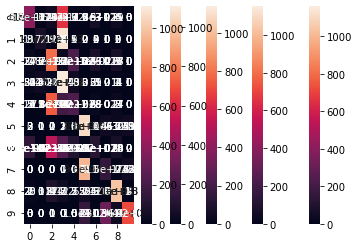

In [62]:
#training and predicting on the PCA-d data using-
#K-Neighbors
#Decision Tree
#Random Forest
#AdaBoost
#Gradient Boosting

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns

classifiers = [
    KNeighborsClassifier(3),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    ]  
    
for classifier in classifiers:
    model = classifier.fit(X_train, y_train)
    print("\n The Classifier is \n " +str(classifier))
    print("\n The Model's Score is %.3f" % model.score(X_test, y_test))
    y_pred_best = model.predict(X_test)
    cm=confusion_matrix(y_test, y_pred_best, labels=None, sample_weight=None)
    print("Confusion Matrix for this", classifier)
    print(cm)
    print('')
    print(sns.heatmap(cm, annot=True))
    print('')
    print(classification_report(y_test,y_pred_best))
    #cross validation- only for KNN classifier (time reasons)
    if (str(classifier) == 'KNeighborsClassifier(n_neighbors=3)'):  #CROSS VALIDATION! activate only KNN
        score= cross_val_score(classifier, X_test, y_test, cv=4,scoring='accuracy')
        print("This KNN model's Accuracy Score with cross validation is ", score)
        print('')
        
        #pyplot.boxplot(score)
        #pyplot.show()
  
 #sns.heatmap(pd.DataFrame(classification_report).iloc[:-1, :].T, annot=True)

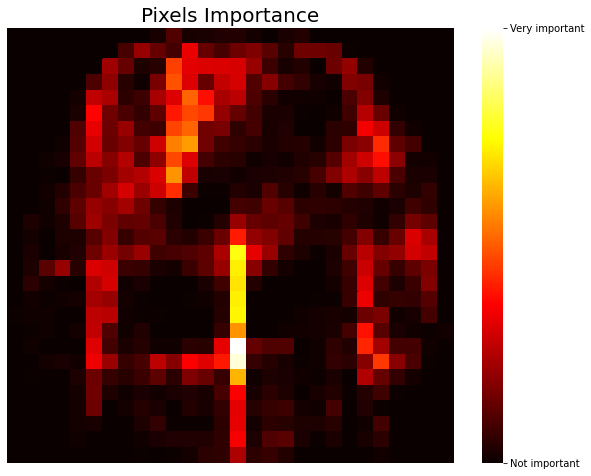

In [55]:
#PLOTTING PIXELS IMPORATNCE! BY RANDOM FORESTS

model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
model.fit(X, y) #on the ORIGINAL dataset (features: X! so we won't lose features according to the PCA procedure)

importances = model.feature_importances_
pixels = np.reshape(importances,(28,28)) #since the shape of the dataset is (60000,728)

plt.figure(figsize= (10,8))
plot = sns.heatmap(pixels,cmap=plt.cm.hot)
plt.xticks([], [])
plot.set_yticks([])
plot.set_yticks([], minor=True)
colorbar = plot.collections[0].colorbar
colorbar.set_ticks([0,max(importances)])
colorbar.set_ticklabels(['Not important','Very important'])
plt.title('Pixels Importance',size = 20)
plt.show()

In [13]:
#fun fact! this is the second time Random Forest is used. the first time on the PCA-d data, and now on the ORIGINAL one.

#Let's compare the model's results according to the datas!

print('Random Forest classifier on the ORIGINAL data results in:')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("\n The Model's Score is %.3f" % model.score(X_test, y_test))

y_pred_best = model.predict(X_test)
cm=confusion_matrix(y_test, y_pred_best, labels=None, sample_weight=None)
print(cm)
print(classification_report(y_test,y_pred_best))

#seeing this, the model works better on the PCA-d data. since it has less features..

Random Forest classifier on the ORIGINAL data results in:

 The Model's Score is 0.769
[[ 943    7   47  154    3    1    3    0   31    0]
 [   0 1037   27  121    3    0    0    0    1    0]
 [  11    0  896   17  249    1    4    0   26    0]
 [  36    5   47 1140   25    0    2    0    5    0]
 [   2    5  176  152  856    0    5    0   12    0]
 [   0    1    0    2    0 1005    0  108   17   55]
 [ 289    3  257  114  398    3   86    0   45    0]
 [   0    0    0    0    0   13    0 1041    5  101]
 [   6    1   45   34    4    9    2    3 1104    2]
 [   1    0    0    0    0   10    0   59    3 1124]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1189
           1       0.98      0.87      0.92      1189
           2       0.60      0.74      0.66      1204
           3       0.66      0.90      0.76      1260
           4       0.56      0.71      0.62      1208
           5       0.96      0.85      0.90      1188
   

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

#predicting by Logistic Regression on the ORIGINAL dataset (not the PCA-d one)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Creating and training the model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

#Evaluating the model
cfm = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1189
           1       0.97      0.97      0.97      1189
           2       0.74      0.78      0.76      1204
           3       0.86      0.87      0.86      1260
           4       0.73      0.78      0.75      1208
           5       0.94      0.90      0.92      1188
           6       0.66      0.55      0.60      1195
           7       0.91      0.93      0.92      1160
           8       0.93      0.94      0.93      1210
           9       0.93      0.94      0.93      1197

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



C:\Users\97252\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
#Gaussian Bayes predictor on the original data

from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = data.drop("label",axis = 1)
y = data.label

#Naive Bayes algorithm
print (X_train.shape)
model = GaussianNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Evaluating the model
print('Confusion Matrix for Gaussian Bayes')
print('')
cfm = metrics.confusion_matrix(y_test, predictions)
print(cfm)
print('')
print(classification_report(y_test, predictions))

(48000, 784)
Confusion Matrix for Gaussian Bayes

[[ 729   50   37  229   87    1   25    0   31    0]
 [   2 1117   12   43    3    0   11    0    1    0]
 [   2   10  409   87  651    0   15    0   30    0]
 [   5  427    6  772   40    0    8    0    2    0]
 [   1   42   55  206  890    0    3    0   11    0]
 [   0    2    2    3    0  331    5  806    7   32]
 [ 138   36  156  261  505    0   42    0   57    0]
 [   0    0    0    0    0    8    0 1126    4   22]
 [   3    2   20  111  168   10   22    2  870    2]
 [   0    0    3    1    1   33    4  337    5  813]]

              precision    recall  f1-score   support

           0       0.83      0.61      0.70      1189
           1       0.66      0.94      0.78      1189
           2       0.58      0.34      0.43      1204
           3       0.45      0.61      0.52      1260
           4       0.38      0.74      0.50      1208
           5       0.86      0.28      0.42      1188
           6       0.31      0.04      

In [56]:
#CNN- NEURAL NETWORK predictor

#Define, Compile, and Fit the Keras Classification Model

#Reshape the inputs (X_train and X_test) to a shape that can be an input for the CNN model.
#The Keras reshape function takes as arguments the number of images
#(60,000 for X_train and 10,000 for X_test), the shape of each image (28×28), and
#the number of color channels – 1 in this case because images are greyscale.

#reading the dataset imported

from keras.datasets import fashion_mnist

# loading the Fashion-Mnist dataset

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


X_train = X_train.reshape(X_train.shape[0],28,28,1)

X_test = X_test.reshape(X_test.shape[0],28,28,1)

#Then, one-hot-encode the target variable, mapping a variable to each target label – 
#in our case, ‘0’, ‘1’, ‘2’, etc. because we are recognizing the type of products as cloths and bag. 

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

y_train[0]

from keras.models import Sequential

from keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))

model.add(Conv2D(32, kernel_size=3, activation='relu'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

print(X_train.shape)
print(y_train.shape)

# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0


# build the model
model.fit(X_train, y_train, epochs=5)

print('')

pred_test= model.predict(X_test)
scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores[1], 1 - scores[1]))   

(60000, 28, 28, 1)
(60000, 10)
Epoch 1/5
60000/60000 [==============================] - 93s 2ms/step - loss: 0.3874 - accuracy: 0.8630
Epoch 2/5
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2609 - accuracy: 0.9066
Epoch 3/5
60000/60000 [==============================] - 93s 2ms/step - loss: 0.2124 - accuracy: 0.9234
Epoch 4/5
60000/60000 [==============================] - 94s 2ms/step - loss: 0.1739 - accuracy: 0.9363
Epoch 5/5
60000/60000 [==============================] - 94s 2ms/step - loss: 0.1422 - accuracy: 0.9477

Accuracy on test data: 0.9125999808311462% 
 Error on test data: 0.08740001916885376
